In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use('ggplot')

In [82]:
bpvnp_material_df = pd.read_csv('bpvnp_by_material.csv', delimiter='|')
bpvnp_material_df['win_rate'] = bpvnp_material_df['wins'] / bpvnp_material_df[['wins','draws','losses']].sum(axis=1)
bpvnp_material_df['draw_rate'] = bpvnp_material_df['draws'] / bpvnp_material_df[['wins','draws','losses']].sum(axis=1)
bpvnp_material_df['average_points'] = bpvnp_material_df['win_rate'] + 0.5 * bpvnp_material_df['draw_rate']
bpvnp_material_df

,material,wins,draws,losses,win_rate,draw_rate,average_points
0,33,7934,602,6474,0.528581,0.040107,0.548634
1,32,13328,991,10585,0.535175,0.039793,0.555071
2,31,4422,310,3421,0.542377,0.038023,0.561388
3,30,646,41,521,0.534768,0.033940,0.551738
4,29,60,5,61,0.476190,0.039683,0.496032
5,28,4817,658,4822,0.467806,0.063902,0.499757


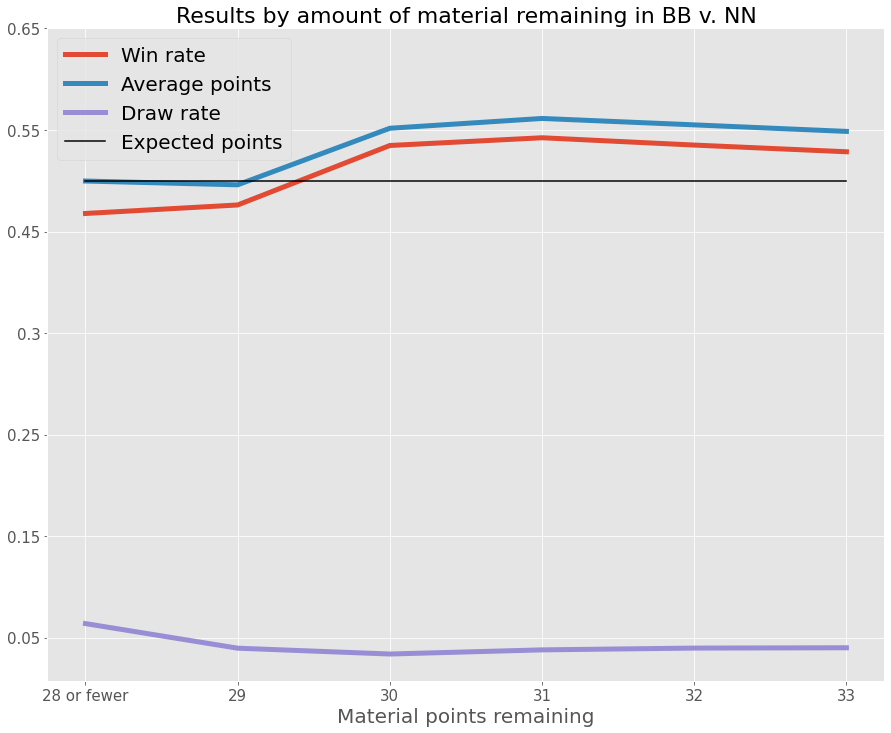

In [83]:
fig, ax = plt.subplots(figsize=(15,12))

ax.plot(bpvnp_material_df['material'], bpvnp_material_df['win_rate'], linewidth=5)
ax.plot(bpvnp_material_df['material'], bpvnp_material_df['average_points'], linewidth=5)
ax.plot(bpvnp_material_df['material'], bpvnp_material_df['draw_rate'], linewidth=5)
ax.plot([28, 33], [0.5, 0.5], color='black')

ax.set_title('Results by amount of material remaining in BB v. NN', fontsize=22)

ax.legend(['Win rate','Average points','Draw rate','Expected points'],
            prop={'size': 20})

ax.set_xlabel('Material points remaining', fontsize=20)

ax.set_xticks(np.arange(28, 34))
ax.set_xticklabels(['28 or fewer','29','30','31','32','33'],
                    fontdict={'fontsize': 15});

ax.set_yticks(np.arange(0.05, 0.75, 0.1))
ax.set_yticklabels(['0.05','0.15','0.25','0.3','0.45','0.55','0.65'],
                    fontdict={'fontsize': 15})
                    
plt.savefig('../images/bbnn_by_material.png');

In [58]:
nbvrp_df = pd.read_csv('nbvrp_by_queens.csv', delimiter="|")
nbvrp_df['win_rate'] = nbvrp_df['wins'] / nbvrp_df[['wins','draws','losses']].sum(axis=1)
nbvrp_df['draw_rate'] = nbvrp_df['draws'] / nbvrp_df[['wins','draws','losses']].sum(axis=1)
nbvrp_df['loss_rate'] = nbvrp_df['losses'] / nbvrp_df[['wins','draws','losses']].sum(axis=1)
nbvrp_df

,queen_present,wins,draws,losses,win_rate,draw_rate,loss_rate
0,'both',13141,1346,10466,0.526630,0.053941,0.419429
1,'yes',8532,604,6187,0.556810,0.039418,0.403772
2,'no',4609,742,4279,0.478609,0.077051,0.444341


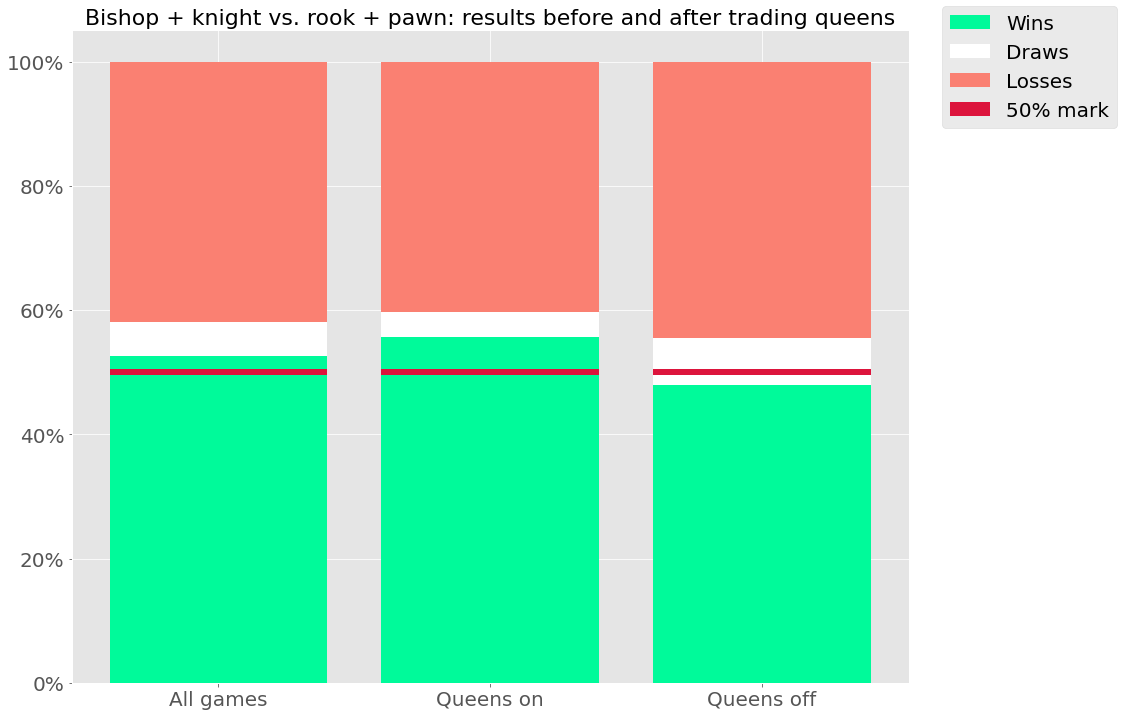

In [96]:
fig, ax = plt.subplots(figsize=(15, 12))

x = ['All games', 'Queens on', 'Queens off']
y1 = nbvrp_df['win_rate']
y2 = nbvrp_df['draw_rate']
y3 = nbvrp_df['loss_rate']
y4 = 0.01

ax.bar(x, y1, color='mediumspringgreen')
ax.bar(x, y2, bottom=y1, color='white')
ax.bar(x, y3, bottom=y1+y2, color='salmon')
ax.bar(x, y4, bottom=0.495, color='crimson')

ax.set_title('Bishop + knight vs. rook + pawn: results before and after trading queens', fontsize=22)

ax.legend(['Wins','Draws','Losses','50% mark'],
            prop={'size': 20}, loc=(1.04, 0.85))

plt.xticks(size=20)
plt.yticks(size=20)
ax.set_yticks(np.arange(0, 1.2, 0.2))
ax.set_yticklabels(['0%','20%','40%','60%','80%','100%'])
                    
plt.savefig('../images/nbvrp_by_queens.png');